# Data Analysis

Now that the data has been collected, processed, and cleaned, I then conducted exploratory data analysis to find trends, or an explanation to my original question, which was:
- Why is the U.S. consistently less happy than other large countries, and can economic indicators help explain this gap?

First I queried the data from my database that comprises of two tables, so that I had the columns and data to use for my analysis:
- World_Bank_Data
- Happiness_Index_Data

In [18]:
# Importing the necessary imports and packages
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Path to my database file
db_path = '/files/me204-2025-project-jayden/data/database.db'

# Connected to the SQLite database using sqlite3
conn = sqlite3.connect(db_path)

# This is the SQL query to select everything (*) from the table
query = "SELECT * FROM world_bank_data"
# Read the entire table into a pandas DataFrame
df = pd.read_sql_query(query, conn)

df.head()

,Country,Year,GDP_Current_USD,Health_Expenditure_percent_GDP,Education_Expenditure_percent_GDP,Unemployment_Rate_percent,Inflation_Annual_percent,FDI_Net_Inflows_percent_GDP,Population_Total,Life_Expectancy_Years,Govt_Effectiveness,Rule_of_Law,Control_of_Corruption,Political_Stability,Voice_and_Accountability,GDP_Per_Capita
0,Denmark,2018,355293374912,10.10,7.30,5.13,0.81,2.47,5793636,80.95,1.81,1.77,2.16,0.93,1.57,61324.77
1,Denmark,2019,345401473013,10.15,7.26,5.02,0.76,-1.10,5814422,81.45,1.87,1.83,2.12,0.97,1.54,59404.27
2,Denmark,2020,355631021932,10.72,7.38,5.64,0.42,0.36,5831404,81.60,1.84,1.81,2.24,0.92,1.51,60985.49
3,Denmark,2021,408378204640,10.75,7.00,5.04,1.85,4.16,5856733,81.40,1.96,1.90,2.33,0.93,1.54,69727.99
4,Denmark,2022,401945576108,9.48,5.30,4.43,7.70,7.67,5903037,81.30,1.99,1.90,2.40,0.87,1.59,68091.32


In [20]:
# Connect to the database
conn = sqlite3.connect('/files/me204-2025-project-jayden/data/database.db')

# SQL JOIN query
# I inner joined both datasets on the Foreign Key from the world bank data of country and year on the 
# Primary Key of country and year from the happiness_index_data dataset. This ensured all the matching 
# I also selected all of the columns from both datasets, so that if I nedded any columns I could use it.
# I also placed rank before any of the world happiness index data for readability
query = """
SELECT 
    h.Rank,
    w.*,
    h.Happiness_Score,
    h.Social_support,
    h.Freedom_to_make_life_choices,
    h.Generosity,
    h.Perceptions_of_corruption
FROM 
    world_bank_data w
JOIN 
    happiness_index_data h
ON 
    w.Country = h.Country AND w.Year = h.Year;
"""

# Loaded the joined data into a DataFrame for use in the analysis
df = pd.read_sql_query(query, conn)
# Closed the connection and printed the first 5 rows
conn.close()
df.head()


,Rank,Country,Year,GDP_Current_USD,Health_Expenditure_percent_GDP,Education_Expenditure_percent_GDP,Unemployment_Rate_percent,Inflation_Annual_percent,FDI_Net_Inflows_percent_GDP,Population_Total,...,Rule_of_Law,Control_of_Corruption,Political_Stability,Voice_and_Accountability,GDP_Per_Capita,Happiness_Score,Social_support,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,3,Denmark,2018,355293374912,10.10,7.30,5.13,0.81,2.47,5793636,...,1.77,2.16,0.93,1.57,61324.77,7.56,1.59,0.68,0.28,0.41
1,2,Denmark,2019,345401473013,10.15,7.26,5.02,0.76,-1.10,5814422,...,1.83,2.12,0.97,1.54,59404.27,7.60,1.57,0.59,0.25,0.41
2,2,Denmark,2020,355631021932,10.72,7.38,5.64,0.42,0.36,5831404,...,1.81,2.24,0.92,1.51,60985.49,7.65,0.96,0.95,0.07,0.17
3,2,Denmark,2021,408378204640,10.75,7.00,5.04,1.85,4.16,5856733,...,1.90,2.33,0.93,1.54,69727.99,7.62,0.95,0.95,0.03,0.18
4,2,Denmark,2022,401945576108,9.48,5.30,4.43,7.70,7.67,5903037,...,1.90,2.40,0.87,1.59,68091.32,7.64,1.24,0.72,0.19,0.53


Now that I joined both datasets on the primary keys of Country and Year, I can use one simple data for any analysis. I first began looking at correlations, which helps identify potential drivers of happiness and economic performance across countries.

In [ ]:
# Drop 'Year', 'Population_Total', and 'Rank' before correlation because they are uneeded
# and surely do not matter when comparing happiness with indicators
filtered_for_correlations = df.drop(columns=["Year", "Rank", "Population_Total"])

# Computed correlations for every indicator needed
correlations = filtered_for_correlations.corr(numeric_only=True)["Happiness_Score"].drop("Happiness_Score").sort_values(ascending=False)

# Created the correlation table
corr_table = pd.DataFrame({
    "Indicator": correlations.index,
    "Correlation with Happiness Score": correlations.values
}).reset_index(drop=True)

# Rounded the numbers by 3
corr_table["Correlation with Happiness Score"] = corr_table["Correlation with Happiness Score"].round(3)
corr_table

,Indicator,Correlation with Happiness Score
0,Rule_of_Law,0.930
1,Voice_and_Accountability,0.866
2,Control_of_Corruption,0.828
3,Govt_Effectiveness,0.772
4,Political_Stability,0.702
5,Life_Expectancy_Years,0.684
6,Education_Expenditure_percent_GDP,0.386
7,Freedom_to_make_life_choices,0.322
8,Unemployment_Rate_percent,0.241
9,Social_support,0.037


/tmp/ipykernel_395/2041949466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")


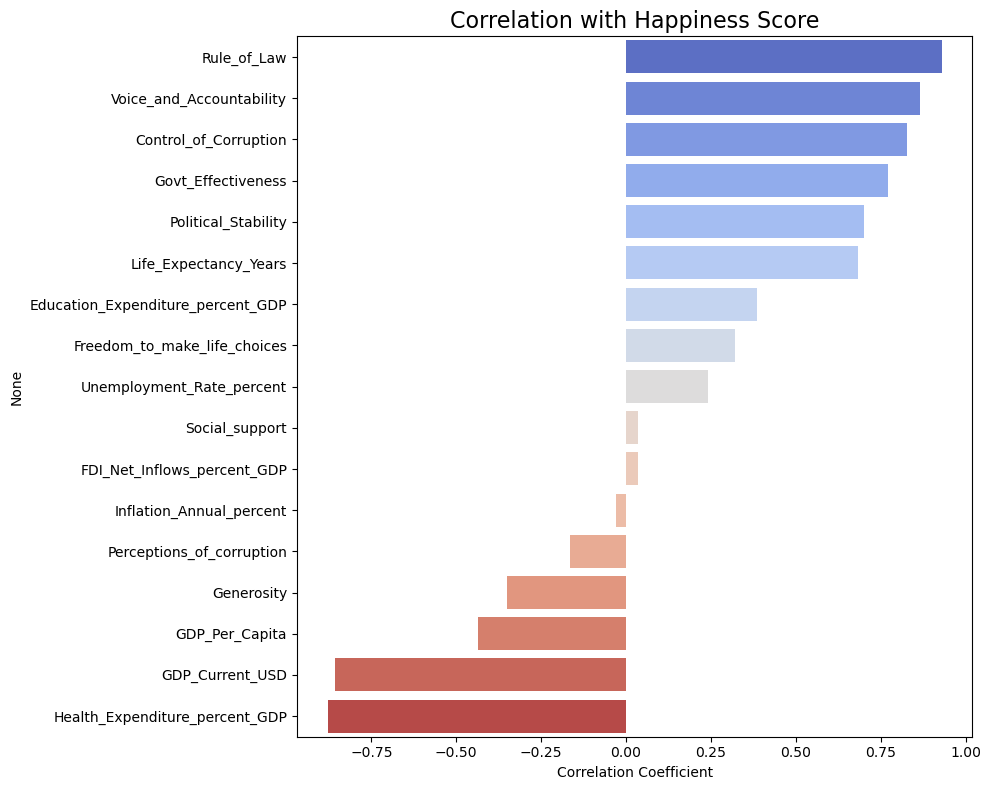

In [ ]:
# Plotting this correlation data, to betteer vizualize the trends
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title("Correlation with Happiness Score", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

After computing the correlations of economic and health indicators to happiness, It can be seen that 

/tmp/ipykernel_395/1427154934.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_no_us.values, y=correlations_no_us.index, palette="coolwarm")


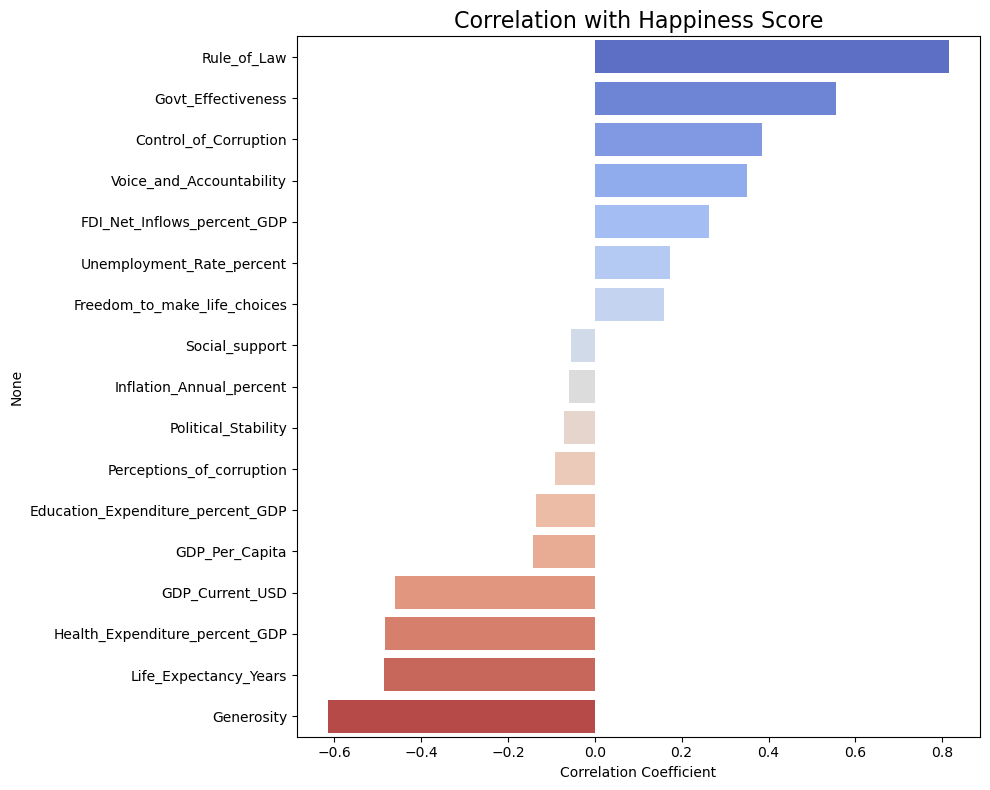

In [26]:
# Exclude United States and drop Year and Rank
filtered_for_correlations = filtered_for_correlations[filtered_for_correlations["Country"] != "United States"]

# Compute correlations
correlations_no_us = filtered_for_correlations.corr(numeric_only=True)["Happiness_Score"].drop("Happiness_Score").sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_no_us.values, y=correlations_no_us.index, palette="coolwarm")
plt.title("Correlation with Happiness Score", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

In [ ]:
# Created correlation table
corr_table = pd.DataFrame({
    "Indicator": correlations_no_us.index,
    "Correlation with Happiness Score": correlations_no_us.values
}).reset_index(drop=True)

# Rounded values to three decimal points
corr_table["Correlation with Happiness Score"] = corr_table["Correlation with Happiness Score"].round(3)
corr_table

,Indicator,Correlation with Happiness Score
0,Rule_of_Law,0.815
1,Govt_Effectiveness,0.554
2,Control_of_Corruption,0.384
3,Voice_and_Accountability,0.351
4,FDI_Net_Inflows_percent_GDP,0.262
5,Unemployment_Rate_percent,0.174
6,Freedom_to_make_life_choices,0.158
7,Social_support,-0.054
8,Inflation_Annual_percent,-0.059
9,Political_Stability,-0.071
